In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt=pd.read_csv('social_network_ads.csv')
print(dt)

In [9]:
dt.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [10]:
dt.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

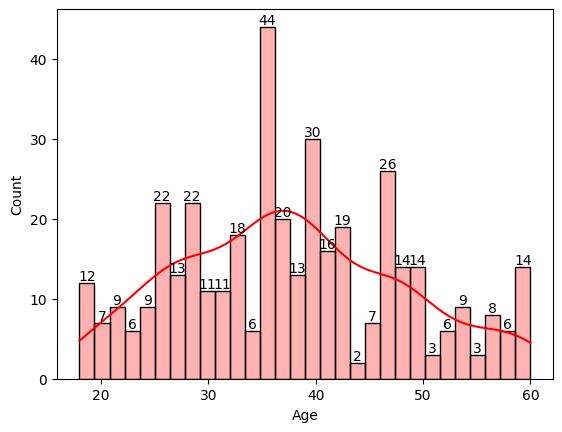

In [6]:
hisplot = sns.histplot(dt['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in hisplot.containers:
   hisplot.bar_label(i)  
   plt.show()

In [15]:
skewness = dt['Age'].skew()
print(skewness)
mean=np.mean(dt['Age'])
print(mean)
md=np.median(dt['Age'])
print(md)
sd=np.std(dt['Age'])
print(sd)
skew=(3*(mean-md))/sd
print(skew)

0.23133746309642822
37.655
37.0
10.46976480156073
0.18768329921863006


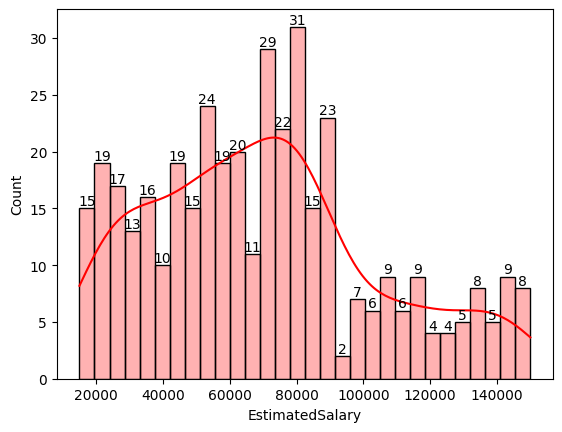

In [12]:
hisplot=sns.histplot(dt['EstimatedSalary'],kde=True,bins=30,color='red',alpha=0.3)
for i in hisplot.containers:
    hisplot.bar_label(i)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [16]:
print("Test Data:\n", x_test[:10])
print("-"*40)
print("Predicted Labels: ", pred[:10])
print("-"*40)
print("Actual Labels:\n", y_test[:10])

Test Data:
 [[-1.78637547  2.02760736 -1.63802906  1.70317261  0.58273758 -0.20124431
  -0.08283587  0.99558151  0.52967111 -0.62203481]
 [-0.0808785   1.89314893 -0.09139956 -0.21865328 -1.06060507 -0.17303473
   0.07881986 -0.45454772  0.59364665  0.05225849]
 [ 1.50341983  1.45657049 -1.56149322  0.87645565 -0.21166698 -0.07357104
   0.68637592 -2.15238354  0.85383317 -0.33012009]
 [ 1.66147017  2.8436782  -0.1758544  -1.64318881  0.23070091 -0.49269557
  -2.32718638 -0.10325476 -0.66024458  0.02088649]
 [ 0.20780251  1.1833045   0.84073448 -0.14702542 -0.53216856 -0.00508756
   1.13207647 -0.55011528  1.05820295 -1.29262535]
 [ 1.56341336 -0.35502905 -0.35141424  0.02390304  1.53236772  0.16021698
   1.3275256   0.14488783  0.74049332 -0.81842867]
 [ 0.36064789  0.14736358  1.64337816 -0.3202978  -0.03120349  0.13421424
   1.55767948 -2.07781182  1.0308127  -0.8634936 ]
 [ 1.45582232 -1.45501912  0.4572804   0.08199556  0.78905669  0.20992987
   0.74774848 -0.7341738   0.05670127  

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, pred, labels=lr.classes_)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[56 11]
 [ 6 52]]


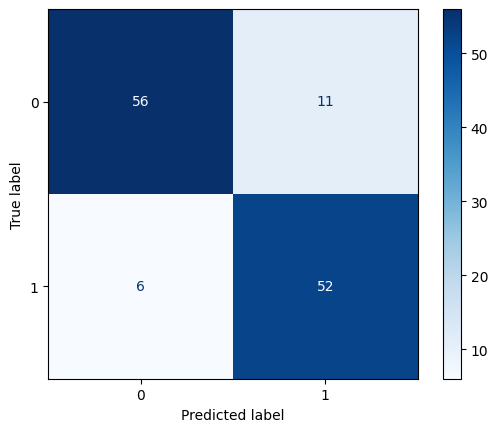

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
display_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
display_matrix.plot(cmap=plt.cm.Blues)
plt.show()

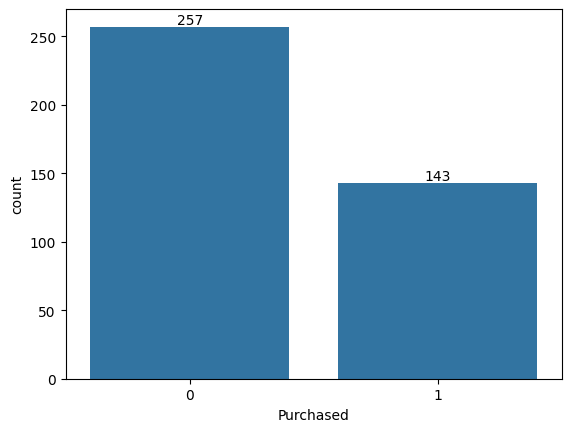

In [7]:
countplot = sns.countplot(x='Purchased', data=dt)
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

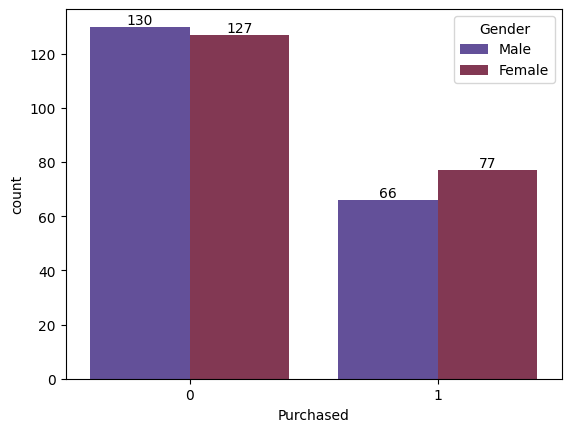

In [13]:
countplot = sns.countplot(x='Purchased', hue='Gender', data=dt ,palette='twilight')
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

In [22]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=dt[['Age','EstimatedSalary']]
y=dt['Purchased']
scaler=StandardScaler()
x=scaler.fit_transform(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import LabelEncoder

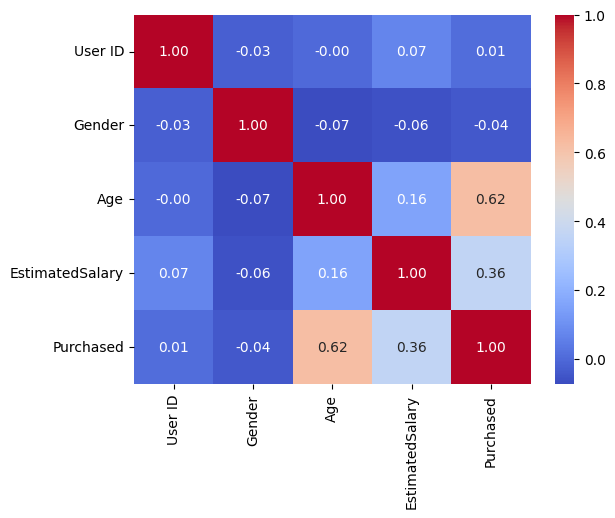

In [34]:
label_encoder = LabelEncoder()
dt['Gender'] = label_encoder.fit_transform(dt['Gender'])  

# Compute and plot correlation
heatmap = dt.corr()
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate synthetic classification data
x, y = make_classification(n_samples=500, n_features=10, random_state=42)



# Train a classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)  # <-- Corrected variable names

# Make predictions
y_pred = clf.predict(x_test)  # <-- Corrected variable names

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'Xtrain' is not defined